**Justified Graphs** are commonly used in Space Syntax methodology to represent the minimum number of topological steps that it requires to go from one specific point to all other points in the network.

This is usually an useful excercise to comnpare difference in the _depth_ (max number of steps) of different locations of a spatial structure.

Commonly, one looks at the depth difference between all entrances to a building and/or closeby metro stations to a plaza. 

The main idea representede beautifly by these escercises is that '**things looks different depending from where you are**'

____

#### Setup 
Let's load neccesary libraries and core function before we look one example

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def jgraph_from_multiple_origins(G, origins, fig_size=(10, 4)):
    """
    Draws a Justified graph (J-graph) from multiple origins with a gradient color range.
    Handles both a list of origins or a single origin by treating it as a list.
    
    Parameters:
    G (networkx.Graph): The graph to visualize.
    origins: A single origin or a list of origin nodes for path calculations.
    fig_size (tuple): The dimensions for the figure size (width, height).
    
    Returns:
    None: Displays the graph visualization with a gradient color scale.
    """
    # Ensure origins is a list even if a single node is provided
    if not isinstance(origins, list):
        origins = [origins]
    
    # Initialize dictionary to keep the shortest paths from any origins
    min_path_lengths = {}

    # Calculate shortest paths from each origin and update the minimum path length
    for origin in origins:
        path_lengths = nx.single_source_shortest_path_length(G, source=origin)
        for node, length in path_lengths.items():
            if node in min_path_lengths:
                min_path_lengths[node] = min(min_path_lengths[node], length)
            else:
                min_path_lengths[node] = length

    # Create a new graph to visualize
    G_vis = nx.Graph()

    # Adding nodes with minimum path length as attribute
    for node, length in min_path_lengths.items():
        G_vis.add_node(node, steps=length)

    # Preserve original edges
    G_vis.add_edges_from(G.edges())

    # Use a colormap and normalize based on the max path length for color mapping
    max_depth = max(min_path_lengths.values())
    norm = mcolors.Normalize(vmin=0, vmax=max_depth)
    cmap = plt.cm.viridis

    # Prepare color values according to the normalized data
    colors = [cmap(norm(min_path_lengths[node])) for node in G_vis.nodes()]

    # Positioning nodes by topological steps
    pos = nx.multipartite_layout(G_vis, subset_key='steps', align='horizontal', scale=1.75)

    # Drawing the graph
    fig, ax = plt.subplots(figsize=fig_size)
    nx.draw(G_vis, pos=pos, node_color=colors, with_labels=True, node_size=800, ax=ax)

    # Adding a colorbar with correct axis context
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Shortest path length to nearest origin')

    # Calculating and displaying graph metrics
    mean_depth = sum(min_path_lengths.values()) / len(min_path_lengths)
    print(f'Mean depth = {mean_depth:.2f}')
    print(f'Maximum topological steps = {max_depth}')


#### Example
## Casa Rio Frio - Salmona

:::{.callout-note}
Originally this tool was created during my Salmona Residency program in 2019 (Sponsored by the Brithish Council).

The idea was to create this easy visualization tool to analise several of Salmona's buildings.
This tool was used during several workshops lead on-site, where the concept of graph analysis was introduced to local students and researchers.
:::

#### The House
Located in a nearby rural area of Bogota (Colombia), this house was designed by Rogelio Salmona, for his personal enjoyment. In a nutshell is, it supposed to distill a lot of the design principles he develop throughout the years. In this case we tried to compare the **extent to which his idea of building a house that celebrates the outdoors (in a challenging climate), could be reflcted on the overall configuation of the spaces**.

<table>
<tr>
    <td style="border: none;">
        <img src="images/jgraph_1.png" alt="Layout distribution" style="width:100%; max-height:200px;"/>
        <div style="text-align:center;">Layout Distribution</div>
    </td>
    <td style="border: none;">
        <img src="images/jgraph_2.png" alt="Patio 2" style="width:100%; max-height:200px;"/>
        <div style="text-align:center;">Patio 2</div>
    </td>
</tr>
</table>


In _syntax_ literature, the effects of **building cores** -the most 'connectected' parts of a building- are commonly studied. According to famous theories (**like the natural movement** - Hiller), it is vital to understand the extent to which said core aligns with the movments of a building. In theory, the more this two are in sync, the more one can presume that the driving force for movement is due to the layout of spaces.

Yet, in this excercise all it was intended was to Visualize through individual locations, a property of _'depth'_ of the overall building.
The beauty of this methos is that once can easily isolate and compare how two different spaces percieve the whole graph in relative terms from their local origin.

Hence, one need to begin to identify the units of analysis. Which in this case, I was using _concave spaces_ (spaces where all inner points are mutually visible).

![Connections based on concave spaces](images/jgraph_3.png){height=200px}

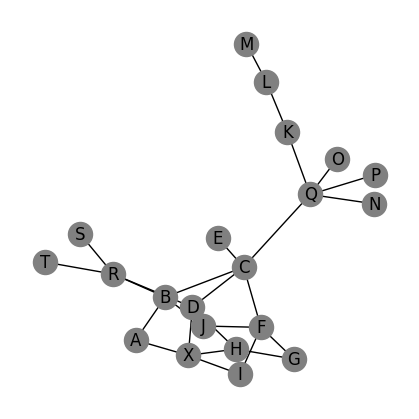

In [2]:
#List of all connections. Future node edges
edges = [('M','L'),('L','K'),('K','Q'),('O','Q'),('Q','P'),('N','Q'),
         ('Q','C'),('C','E'),('T','R'),('S','R'),('J','B'),('J','F'),
         ('B','R'),('B','C'),('B','A'),('R','D'),('C','D'),('C','D'),
         ('C','F'),('G','H'),('G','F'),('F','I'),('A','X'),('D','H'),
         ('D','X'),('H','X'),('I','X')]

#Create Graph object
G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(4,4))
nx.draw(G, with_labels = True, node_color ='grey')

Now, it is as easy as selecting one origin space using the **jgraph_from_multiple_origins** function to rapidly have a common J-Graph!

For example, one can look at the entrance hall (`C`) and compare it to the overall surroundings (in this case grouped under the label `X`)

Mean depth = 1.90
Maximum topological steps = 4


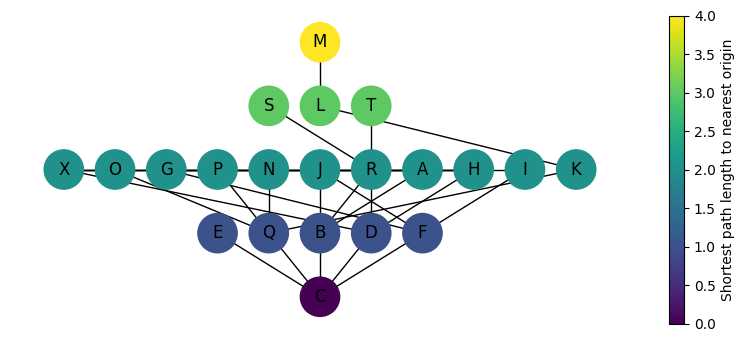

In [3]:
jgraph_from_multiple_origins(G,'C')

Mean depth = 2.67
Maximum topological steps = 6


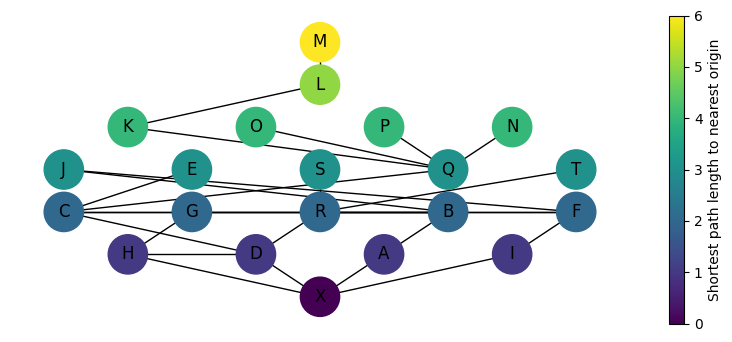

In [4]:
jgraph_from_multiple_origins(G,'X')

To make things more interesting, the function was designed to accept a list of possible origins.

This deviates from the classical idea of a J-Graph, but it is an useful method to visualize and evaluate things like the the maximum topological depth of a builduing from all its entrances. In this case `A`,`D` and `I`.

Mean depth = 1.86
Maximum topological steps = 5


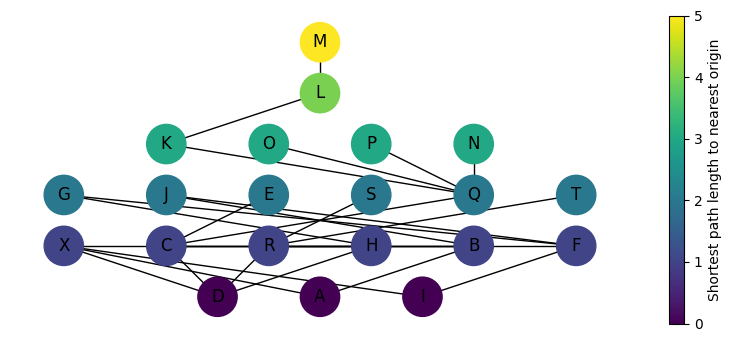

In [5]:
entrances = ['A', 'D', 'I']
jgraph_from_multiple_origins(G,entrances)

In this case one sees that `M` is clearly the outlier. When looking at the correspondance on the floorplan, it corresponds to one of the private bathrooms (the most intimate parts of the layout), which comparatively to the entrances (the most 'public' parts), makes sense to be on polar opposites.

Yet, noticind how heavily loaded the steps 1,2 and 3 are one could definetly start to see the intentionality to move as many instances of the building to the entrnaces. Something that clearly aligns with the architects desire to celebrate the outdoor.

### Bonus: 
#### Exploring _mean depth values_

Even thoough, the objective of this excercise was only about J-Graphs, I have added a small section below looking at aggregate values of _mean depth_ in all instances of the building.



In [6]:
# Define main function
def mean_depth_calcs(G, graph_output=True):
    """
    Calculates mean depth (average shortest path length) from every node to all other nodes in the graph.
    Optionally adds mean depth as a node attribute or returns a DataFrame with mean depths and ranks.

    Parameters:
    G (networkx.Graph): The graph on which to perform calculations.
    graph_output (bool): If True, returns the graph with 'mean_depth' as a node attribute.
                         If False, returns a DataFrame with mean depths and their ranks.

    Returns:
    networkx.Graph or pandas.DataFrame: Depending on the value of graph_output.
    """
    nodes = list(G.nodes())
    mean_depths = {}
    for n in nodes:
        # Compute shortest paths from n to all other nodes
        path_lengths = nx.single_source_shortest_path_length(G, source=n)
        # Calculate mean depth avoiding infinity (no path situations)
        depths = [length for length in path_lengths.values() if length < np.inf]
        mean_depths[n] = np.mean(depths) if depths else np.inf  # Handle isolated nodes

    # Set mean_depth as node attribute if required
    if graph_output:
        nx.set_node_attributes(G, mean_depths, 'mean_depth')
        return G
    else:
        # Create a DataFrame from the mean depths dictionary
        df = pd.DataFrame.from_dict(mean_depths, orient='index', columns=['mean_depth'])
        # Rank the mean_depths, lower is better hence ascending
        df['mean_depth_rank'] = df['mean_depth'].rank(method='min', ascending=True)
        return df

Testing the function with a graph output

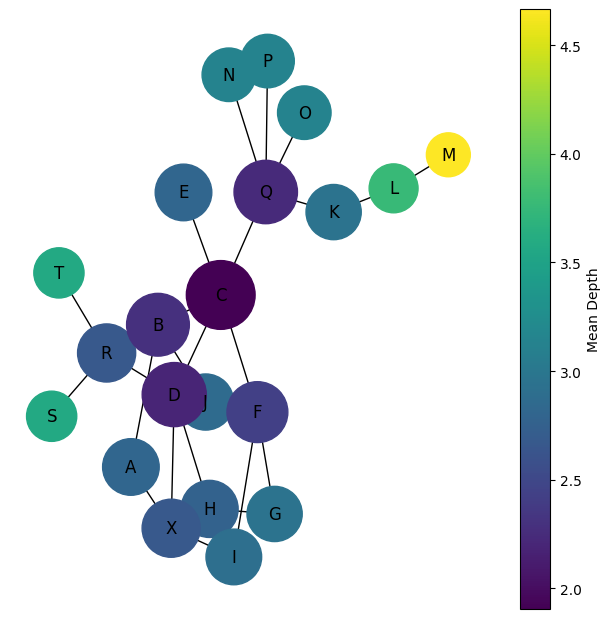

In [7]:
# Default function. Graph output
mean_depth_graph = mean_depth_calcs(G)

# Calculate node sizes inversely proportional to mean_depth values
node_mean_depths = nx.get_node_attributes(mean_depth_graph, 'mean_depth')
max_depth = max(node_mean_depths.values())

# Normalize and invert the sizes
node_sizes = {node: 1000 * (1 / (depth / max_depth)) for node, depth in node_mean_depths.items()}

# Selecting the layout
pos = nx.kamada_kawai_layout(mean_depth_graph)  # Using Kamada-Kawai layout

# Draw the graph
plt.figure(figsize=(6, 6)) 
nx.draw(mean_depth_graph, pos,
        node_color=list(node_mean_depths.values()),
        node_size=[node_sizes[n] for n in mean_depth_graph.nodes()],
        with_labels=True, cmap=plt.cm.viridis)

plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis,
                                   norm=plt.Normalize(vmin=min(node_mean_depths.values()), 
                                                      vmax=max(node_mean_depths.values()))),
             ax=plt.gca(), label='Mean Depth')
plt.show()


Testing function with a DataFrame output

In [8]:
# Testing function with a DataFrame output
mean_depth_df = mean_depth_calcs(G, graph_output=False)

# Print and display ordered DF
print("Top 5 'shallow' nodes:")
mean_depth_df.sort_values('mean_depth', ascending=True).head()


Top 5 'shallow' nodes:


,mean_depth,mean_depth_rank
C,1.904762,1.0
D,2.190476,2.0
Q,2.238095,3.0
B,2.285714,4.0
F,2.428571,5.0


#### Distribution of MEAN DEPTH values

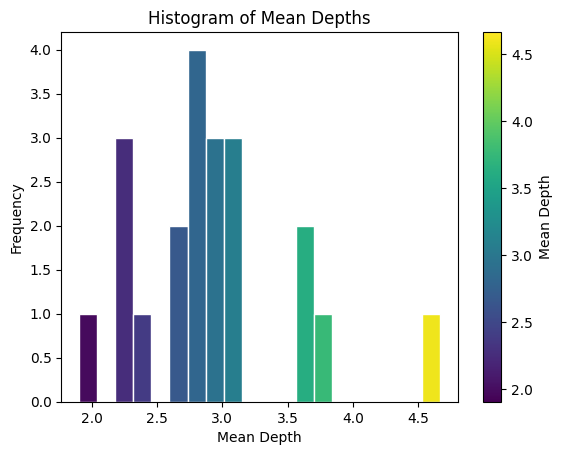

In [9]:
mean_depth_values = mean_depth_df['mean_depth']

# Normalize the data for color mapping
norm = mcolors.Normalize(vmin=min(mean_depth_values), vmax=max(mean_depth_values))
cmap = plt.cm.viridis  # or any other colormap

# Create the histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(mean_depth_values, bins=20, edgecolor='white')

# Calculate the bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Color each bin according to the mean_depth value it represents
for bin_center, patch in zip(bin_centers, patches):
    # Calculate color for the bin based on bin center
    bin_color = cmap(norm(bin_center))
    patch.set_facecolor(bin_color)

# Add a colorbar to show the mapping from color to the mean_depth values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Mean Depth')

# Plotting details
ax.set_title('Histogram of Mean Depths')
ax.set_xlabel('Mean Depth')
ax.set_ylabel('Frequency')
plt.show()

In [10]:
mean_depth_df.mean_depth.describe()

count    21.000000
mean      2.925170
std       0.616951
min       1.904762
25%       2.666667
50%       2.857143
75%       3.142857
max       4.666667
Name: mean_depth, dtype: float64

To see more about this project and the overall residency see [Exploring Salmona](/work/others/articles.qmd) under [Other / Articles](/work/others/articles.qmd) section.